#### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [1]:
import pandas as pd
df=pd.read_csv('employee.csv') # reads the dataset
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [2]:
df.info() #gives concise summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


The dataset consists of 7 columns and 9 rows where 3 columns(age,income,gender) has 2 missing values each

#### 2. Reset the index as "name".

In [3]:
df.set_index('name',inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 3. Select rows for specific names Jack Morgan and Josh Wills.

In [4]:
df.loc[["Jack Morgan","Josh Wills"]]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


#### 4. Select data for multiple values "Sales" and “Finance”.

In [5]:
df.loc[df['department'].isin(["Sales","Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 5. Display employee who has more than 700 performance score

In [6]:
df.loc[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 6. Display employee who has more than 500 and less than 700 performance score

In [7]:
df.loc[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


#### 7. Check and handle missing values in the dataset.

In [8]:
df.isna().sum() # returns the number of missing values per column

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

As per the above output there are 2 values missing from the columns age, income and gender. Since gender is a categorical column we will fill it out using mode. Age and income data values need to be analysed to decide on how the values can be filled

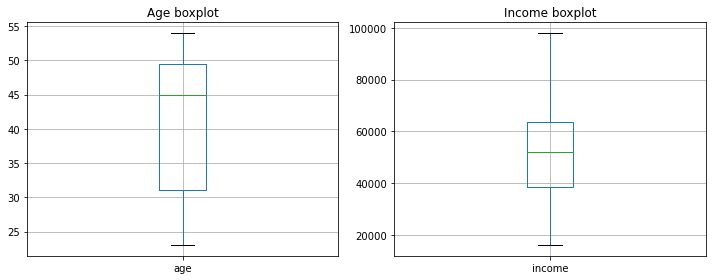

In [10]:
# Checking for presence of outliers in age and income columns using box-plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
df.boxplot(column='age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,2,2)
df.boxplot(column='income')
plt.title('Income boxplot',fontsize=12)
plt.tight_layout()

Since the range of age is not very large we can use mean of ages to fill in the missing values. Since the range of income is comparitively higher we can use median of income to fill in the missing values. As gender is categorical we can use mode to fill in the missing values.

In [13]:
#filling the missing values
df.fillna({'age':round(df['age'].mean()),'income':df['income'].median(),'gender':df['gender'].mode()[0]},inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,40.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,40.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [14]:
#confirming absence of null values
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

#### 8. Check the outliers and handle outliers in performance score using Percentiles

Text(0.5, 1.0, 'Performance score boxplot')

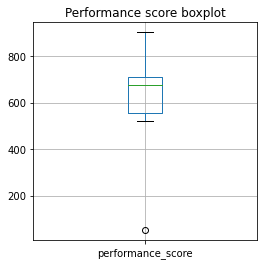

In [17]:
#checking for presence of outliers in performance-score using boxplot
plt.figure(figsize=(4,4))
df.boxplot(column='performance_score')
plt.title('Performance score boxplot',fontsize=12)

In [21]:
# Based on interquartile rule outliers are those data points lying below Q1 or above Q3 by by 1.5 times interquartile range
Q1 = df['performance_score'].quantile(0.25)
Q3 = df['performance_score'].quantile(0.75)
IQR = Q3 - Q1
l_lim=Q1-1.5*IQR
u_lim=Q3+1.5*IQR
print("Q1= ",Q1)
print("Q3= ",Q3)
print("IQR= ",IQR)
print("Upper limit= ",u_lim)
print("Lower limit= ",l_lim)
(df['performance_score'] < (l_lim)) |(df['performance_score'] > (u_lim))

Q1=  556.0
Q3=  711.0
IQR=  155.0
Upper limit=  943.5
Lower limit=  323.5


name
Allen Smith      False
S Kumar          False
Jack Morgan      False
Ying Chin        False
Dheeraj Patel    False
Satyam Sharma    False
James Authur      True
Josh Wills       False
Leo Duck         False
Name: performance_score, dtype: bool

Based on the above output we can see there is only one outlier present

In [26]:
df["performance_score"].where(df["performance_score"] >=l_lim,l_lim, inplace=True)#checks for lower outlier and replaces it with lower limit value
df["performance_score"].where(df["performance_score"] <=u_lim,u_lim, inplace=True)#checks for upper outlier and replaces it with upper limit value
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723.0
S Kumar,40.0,16000.0,F,Finance,G0,520.0
Jack Morgan,32.0,35000.0,M,Finance,G2,674.0
Ying Chin,45.0,65000.0,F,Sales,G3,556.0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711.0
Satyam Sharma,40.0,62000.0,F,Sales,G3,649.0
James Authur,54.0,52000.0,F,Operations,G3,323.5
Josh Wills,54.0,52000.0,F,Finance,G3,901.0
Leo Duck,23.0,98000.0,M,Sales,G4,709.0


Text(0.5, 1.0, 'Performance score boxplot')

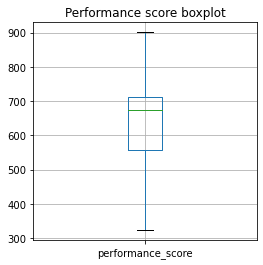

In [27]:
#confirming if the outlier is replaced
plt.figure(figsize=(4,4))
df.boxplot(column='performance_score')
plt.title('Performance score boxplot',fontsize=12)

#### 9. Check the gender column and do Dummy encoding.

In [29]:
print("Count of unique values: ",df['gender'].nunique())#unique value counts of gender column
print("Unique values: ",df['gender'].unique()) # unique values of gender column
# Since gender is a categorical column having values either F or M we can use dummy encoding with one varible less to avoid multicollinearity
df1=df.copy()
pd.get_dummies(df1,columns=['gender'],drop_first=True)

Count of unique values:  2
Unique values:  ['F' 'M']


,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723.0,0
S Kumar,40.0,16000.0,Finance,G0,520.0,0
Jack Morgan,32.0,35000.0,Finance,G2,674.0,1
Ying Chin,45.0,65000.0,Sales,G3,556.0,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711.0,0
Satyam Sharma,40.0,62000.0,Sales,G3,649.0,0
James Authur,54.0,52000.0,Operations,G3,323.5,0
Josh Wills,54.0,52000.0,Finance,G3,901.0,0
Leo Duck,23.0,98000.0,Sales,G4,709.0,1


#### 10. Do the standard scaling on the feature performance score.

In [30]:
data=df['performance_score']
data

name
Allen Smith      723.0
S Kumar          520.0
Jack Morgan      674.0
Ying Chin        556.0
Dheeraj Patel    711.0
Satyam Sharma    649.0
James Authur     323.5
Josh Wills       901.0
Leo Duck         709.0
Name: performance_score, dtype: float64

In [31]:
data.describe()

count      9.000000
mean     640.722222
std      161.118185
min      323.500000
25%      556.000000
50%      674.000000
75%      711.000000
max      901.000000
Name: performance_score, dtype: float64

In [37]:
import numpy as np
from sklearn import preprocessing
standardise=preprocessing.StandardScaler()
data=np.array(data).reshape(-1,1)
data = standardise.fit_transform(data)
data=pd.DataFrame(data)
data.rename(columns = {0:'performance_score'}, inplace = True)
data #after standard scaling

,performance_score
0,0.541644
1,-0.794729
2,0.219072
3,-0.557736
4,0.462647
5,0.054494
6,-2.088312
7,1.713440
8,0.449481


In [38]:
# Before standard scaling the performance-score ranged from 323.5 to 901
#After standard scaling the performance-score range has changed as below:
data.describe().round(2)

,performance_score
count,9.00
mean,-0.00
std,1.06
min,-2.09
25%,-0.56
50%,0.22
75%,0.46
max,1.71
